<a href="https://colab.research.google.com/github/pedro-de-bastos/CS166-Modeling-Simulation-and-Decision-Making/blob/main/Copy_of_CS166_PCW_Session_19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import matplotlib.pyplot as plt
import networkx as nx
import random as rd
import numpy as np

def initialize():
    global g
    g = nx.karate_club_graph()
    g.pos = nx.spring_layout(g)
    for i in g.nodes:
        g.nodes[i]['state'] = 1 if rd.random() < .5 else 0

def observe():
    global g
    cla()
    nx.draw(g, vmin = 0, vmax = 1,
            node_color = [g.nodes[i]['state'] for i in g.nodes],
            pos = g.pos)

def update():
    global g
    listener = rd.choice(list(g.nodes))
    speaker = rd.choice(list(g.neighbors(listener)))
    g.nodes[listener]['state'] = g.nodes[speaker]['state']


def update_reversed():
    global g
    speaker = rd.choice(list(g.nodes))
    listener = rd.choice(list(g.neighbors(speaker)))
    g.nodes[listener]['state'] = g.nodes[speaker]['state']

def update_edge():
    global g
    edge = rd.choice(list(g.edges))
    speaker = rd.choice(edge)
    listener = [j for j in edge if j != speaker][0]
    g.nodes[listener]['state'] = g.nodes[speaker]['state']


def ones_zeros(g):
    ones = 0
    zeros = 0
    for i in g.nodes():
        if g.nodes[i]['state'] == 1:
            ones += 1
        else:
            zeros += 1
    return ones, zeros

def run_experiment(update):
    initialize()
    ones, zeros = ones_zeros(g)


    steps = 0
    while ones != len(g.nodes()) and zeros != len(g.nodes()):
        ones, zeros = ones_zeros(g)
        update()
        steps += 1
    return steps

# Original Update Rule

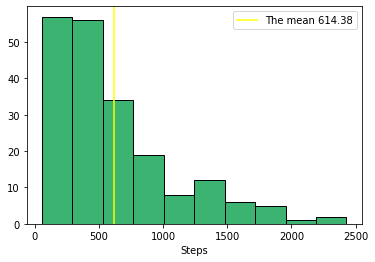

In [7]:
results = []

for i in range(200):
    results.append(run_experiment(update))

plt.hist(results, edgecolor = 'black', color = 'mediumseagreen')
plt.axvline(np.mean(results), color = "yellow", label=f"The mean {np.mean(results)}")
plt.xlabel('Steps')
plt.legend()

# Reversed Update Rule

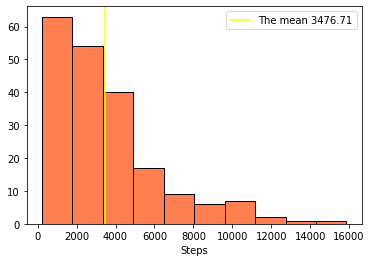

In [4]:
results = []

for i in range(200):
    results.append(run_experiment(update_reversed))

plt.hist(results, edgecolor = 'black', color = 'coral')
plt.axvline(np.mean(results), color = "yellow", label=f"The mean {np.mean(results)}")
plt.xlabel('Steps')
plt.legend()

# Edge Update Rule

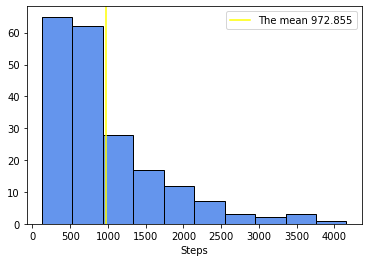

In [5]:
results = []

for i in range(200):
    results.append(run_experiment(update_edge))

plt.hist(results)
plt.hist(results, edgecolor = 'black', color = 'cornflowerblue')
plt.axvline(np.mean(results), color = "yellow", label=f"The mean {np.mean(results)}")
plt.xlabel('Steps')
plt.legend()